In [1]:
import re
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [2]:
# Loading the 20 news group dataset


dataset_train = fetch_20newsgroups(subset='train', 
                             shuffle=True, 
                             random_state=42)
dataset_test = fetch_20newsgroups(subset='test', 
                             shuffle=True, 
                             random_state=42)

In [3]:
num_samples = len(dataset_test.data)

In [4]:
num_samples

7532

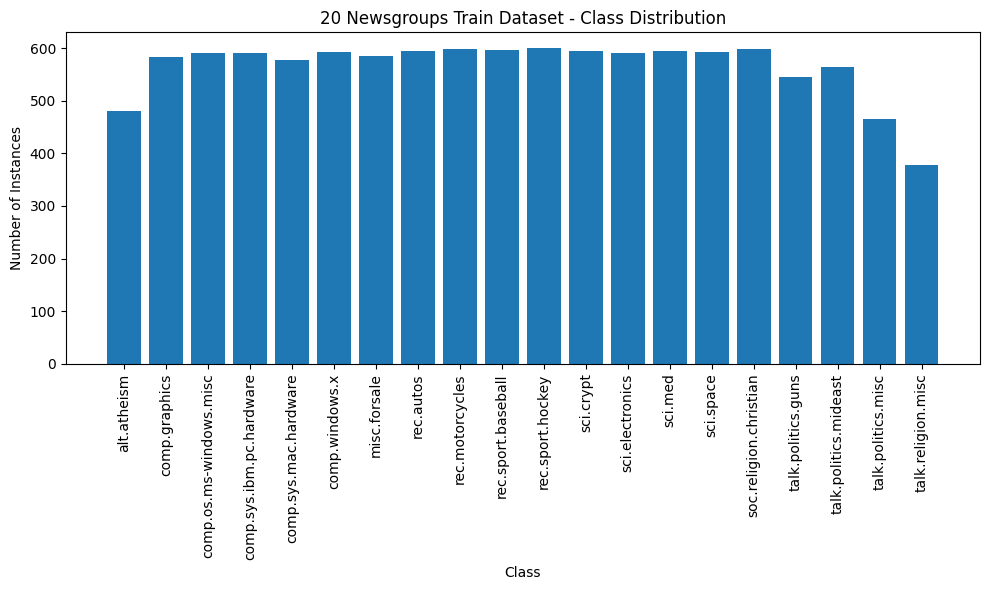

In [5]:
class_names = dataset_train.target_names

# Get class counts
class_counts = [len([target for target in dataset_train.target if target == i]) for i in range(len(class_names))]

# Plot the class counts
plt.figure(figsize=(10, 6))
plt.bar(range(len(class_names)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('20 Newsgroups Train Dataset - Class Distribution')
plt.xticks(range(len(class_names)), class_names,rotation='vertical')
plt.tight_layout()
plt.show()

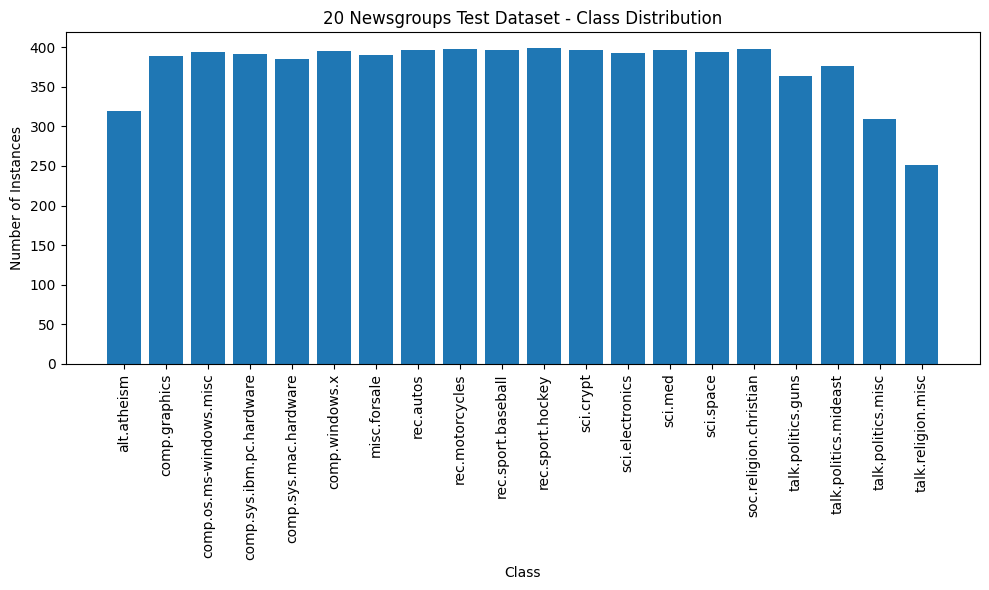

In [6]:
class_names = dataset_test.target_names

# Get class counts
class_counts = [len([target for target in dataset_test.target if target == i]) for i in range(len(class_names))]

# Plot the class counts
plt.figure(figsize=(10, 6))
plt.bar(range(len(class_names)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('20 Newsgroups Test Dataset - Class Distribution')
plt.xticks(range(len(class_names)), class_names,rotation='vertical')
plt.tight_layout()
plt.show()

In [7]:
#Looking at the values
dataset_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
#Looking at the data text
dataset_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [9]:
#Looking at the labels

In [10]:
dataset_train.target[0]

7

### Cleaning and pre-processing

In [11]:
#Creating a function to clean the text

def clean_text(
    string: str, 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string   

In [12]:
# Cleaning the data and creating train and test arrays

X_train = [clean_text(data) for data in dataset_train.data]
y_train = dataset_train.target

X_test = [clean_text(data) for data in dataset_test.data]
y_test = dataset_test.target

In [13]:
# Making the max word length to be constant
max_words = 100000
max_length = 0

# Iterate over the input sequences
for sequence in X_train:
    length = len(sequence.split())  
    if length > max_length:
        max_length = length

In [14]:
# Tokenization
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

max_words = tokenizer.word_index
print("unique words : {}".format(len(max_words)))

unique words : 196742


In [15]:
# Performing padding
sequences =  tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(sequences, maxlen=max_length)

sequences =  tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(sequences, maxlen=max_length)

In [16]:
glove_file = 'glove.6B.100d.txt'


word_index = tokenizer.word_index
embedding_dim = 100

embeddings_index = {}
with open(glove_file, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

In [17]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [18]:
##glove_file = 'glove.6B.100d.txt'
#word_index = tokenizer.word_index
#embedding_dim = 100
#num_words = min(max_words, len(word_index) + 1)
#
#embedding_matrix = np.zeros((num_words, embedding_dim))
#with open(glove_file, 'r', encoding='utf8') as f:
#    for line in f:
#        values = line.split()
#        word = values[0]
#        if word in word_index and word_index[word] < num_words:
#            coefs = np.asarray(values[1:], dtype='float32')
#            embedding_matrix[word_index[word]] = coefs

In [19]:
embedding_matrix[4]

array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

# NN MODELS

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Model 1

In [21]:
# hyperparameters
batch_size = 30
epochs = 10

In [22]:
vocab_size = len(tokenizer.word_index) + 1
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              weights=[embedding_matrix],
                              input_length=max_length, 
                              trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10114, 100)        19674300  
                                                                 
 flatten (Flatten)           (None, 1011400)           0         
                                                                 
 dense (Dense)               (None, 64)                64729664  
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 84405264 (321.98 MB)
Trainable params: 64730964 (246.93 MB)
Non-trainable params: 19674300 (75.05 MB)
_________________________________________________________________


In [24]:
# Train the model
model1.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test_padded, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/10
378/378 [==============================] - 190s 501ms/step - loss: 2.7260 - accuracy: 0.1745
Epoch 2/10
378/378 [==============================] - 190s 502ms/step - loss: 1.6967 - accuracy: 0.4525
Epoch 3/10
378/378 [==============================] - 190s 503ms/step - loss: 1.0602 - accuracy: 0.6706
Epoch 4/10
378/378 [==============================] - 197s 522ms/step - loss: 0.7192 - accuracy: 0.8018
Epoch 5/10
378/378 [==============================] - 193s 511ms/step - loss: 0.4897 - accuracy: 0.8864
Epoch 6/10
378/378 [==============================] - 190s 504ms/step - loss: 0.3033 - accuracy: 0.9346
Epoch 7/10
378/378 [==============================] - 190s 503ms/step - loss: 0.2193 - accuracy: 0.9521
Epoch 8/10
378/378 [==============================] - 191s 504ms/step - loss: 0.1791 - accuracy: 0.9587
Epoch 9/10
378/378 [==============================] - 190s 503ms/step - loss: 0.1571 - accuracy: 0.9604
Epoch 10/10
378/378 [==============================] - 190s 502m

## Model 2
Same model with model1 but changing the activation function to sigmoid

In [25]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              weights=[embedding_matrix],
                              input_length=max_length, 
                              trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10114, 100)        19674300  
                                                                 
 flatten_1 (Flatten)         (None, 1011400)           0         
                                                                 
 dense_2 (Dense)             (None, 64)                64729664  
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 84405264 (321.98 MB)
Trainable params: 64730964 (246.93 MB)
Non-trainable params: 19674300 (75.05 MB)
_________________________________________________________________


In [27]:
# Train the model
model2.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test_padded, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/10
378/378 [==============================] - 191s 503ms/step - loss: 2.5094 - accuracy: 0.2557
Epoch 2/10
378/378 [==============================] - 191s 505ms/step - loss: 1.5328 - accuracy: 0.6353
Epoch 3/10
378/378 [==============================] - 207s 548ms/step - loss: 0.8357 - accuracy: 0.8596
Epoch 4/10
378/378 [==============================] - 198s 525ms/step - loss: 0.4221 - accuracy: 0.9419
Epoch 5/10
378/378 [==============================] - 200s 530ms/step - loss: 0.2452 - accuracy: 0.9620
Epoch 6/10
378/378 [==============================] - 207s 547ms/step - loss: 0.1793 - accuracy: 0.9644
Epoch 7/10
378/378 [==============================] - 204s 540ms/step - loss: 0.1439 - accuracy: 0.9688
Epoch 8/10
378/378 [==============================] - 209s 554ms/step - loss: 0.1293 - accuracy: 0.9706
Epoch 9/10
378/378 [==============================] - 198s 524ms/step - loss: 0.1122 - accuracy: 0.9740
Epoch 10/10
378/378 [==============================] - 196s 519m

## Model 3


In [28]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              weights=[embedding_matrix],
                              input_length=max_length, 
                              trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10114, 100)        19674300  
                                                                 
 flatten_2 (Flatten)         (None, 1011400)           0         
                                                                 
 dense_4 (Dense)             (None, 64)                64729664  
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 20)                660       
                                                                 
Total params: 84406704 (321.99 MB)
Trainable params: 64732404 (246.93 MB)
Non-trainable params: 19674300 (75.05 MB)
_________________________________________________________________


In [30]:
# Train the model
model3.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_test_padded, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/10
378/378 [==============================] - 191s 502ms/step - loss: 2.7663 - accuracy: 0.1750
Epoch 2/10
378/378 [==============================] - 190s 502ms/step - loss: 2.1025 - accuracy: 0.4422
Epoch 3/10
378/378 [==============================] - 190s 502ms/step - loss: 1.5330 - accuracy: 0.6379
Epoch 4/10
378/378 [==============================] - 190s 502ms/step - loss: 1.0748 - accuracy: 0.7858
Epoch 5/10
378/378 [==============================] - 190s 502ms/step - loss: 0.7234 - accuracy: 0.8803
Epoch 6/10
378/378 [==============================] - 190s 503ms/step - loss: 0.4825 - accuracy: 0.9266
Epoch 7/10
378/378 [==============================] - 190s 501ms/step - loss: 0.3240 - accuracy: 0.9494
Epoch 8/10
378/378 [==============================] - 189s 501ms/step - loss: 0.2333 - accuracy: 0.9620
Epoch 9/10
378/378 [==============================] - 190s 501ms/step - loss: 0.1912 - accuracy: 0.9639
Epoch 10/10
378/378 [==============================] - 190s 502m

## Model 4

In [31]:
learning_rate = 0.0001  
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [32]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              weights=[embedding_matrix],
                              input_length=max_length, 
                              trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the model
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
model4.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model4.evaluate(X_test_padded, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/10
378/378 [==============================] - 191s 503ms/step - loss: 2.9410 - accuracy: 0.1151
Epoch 2/10
378/378 [==============================] - 190s 502ms/step - loss: 2.6979 - accuracy: 0.3260
Epoch 3/10
378/378 [==============================] - 190s 503ms/step - loss: 2.4987 - accuracy: 0.5020
Epoch 4/10
378/378 [==============================] - 190s 502ms/step - loss: 2.3221 - accuracy: 0.6257
Epoch 5/10
378/378 [==============================] - 190s 503ms/step - loss: 2.1557 - accuracy: 0.7028
Epoch 6/10
378/378 [==============================] - 192s 508ms/step - loss: 1.9947 - accuracy: 0.7588
Epoch 7/10
378/378 [==============================] - 190s 503ms/step - loss: 1.8383 - accuracy: 0.8142
Epoch 8/10
378/378 [==============================] - 190s 503ms/step - loss: 1.6857 - accuracy: 0.8470
Epoch 9/10
378/378 [==============================] - 190s 502ms/step - loss: 1.5383 - accuracy: 0.8821
Epoch 10/10
378/378 [==============================] - 190s 503m

## Model 5

In [34]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim, 
                              weights=[embedding_matrix],
                              input_length=max_length, 
                              trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Compile the model
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
model5.fit(X_train_padded, y_train, epochs=20, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model5.evaluate(X_test_padded, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/20
378/378 [==============================] - 371s 978ms/step - loss: 2.8141 - accuracy: 0.1294
Epoch 2/20
378/378 [==============================] - 370s 978ms/step - loss: 2.1908 - accuracy: 0.2976
Epoch 3/20
378/378 [==============================] - 370s 979ms/step - loss: 1.7839 - accuracy: 0.4110
Epoch 4/20
378/378 [==============================] - 370s 978ms/step - loss: 1.4807 - accuracy: 0.5382
Epoch 5/20
378/378 [==============================] - 370s 979ms/step - loss: 1.1816 - accuracy: 0.6665
Epoch 6/20
378/378 [==============================] - 369s 977ms/step - loss: 0.8925 - accuracy: 0.7629
Epoch 7/20
378/378 [==============================] - 370s 978ms/step - loss: 0.6901 - accuracy: 0.8220
Epoch 8/20
378/378 [==============================] - 370s 978ms/step - loss: 0.5451 - accuracy: 0.8580
Epoch 9/20
378/378 [==============================] - 369s 977ms/step - loss: 0.4489 - accuracy: 0.8794
Epoch 10/20
378/378 [==============================] - 370s 979m

# CNNs

In [36]:
from keras.layers import Conv1D, GlobalMaxPooling1D

In [37]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, 
                        embedding_dim, 
                        input_length=max_length, 
                        weights=[embedding_matrix], 
                        trainable=False))
model_cnn.add(Conv1D(128, 3, activation='relu'))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(20, activation='softmax'))



In [38]:
# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10114, 100)        19674300  
                                                                 
 conv1d (Conv1D)             (None, 10112, 128)        38528     
                                                                 
 conv1d_1 (Conv1D)           (None, 10110, 64)         24640     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [40]:
# Train the model
model_cnn.fit(X_train_padded, y_train, epochs=20, batch_size=batch_size)

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test_padded, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20
378/378 [==============================] - 201s 531ms/step - loss: 2.1649 - accuracy: 0.2883
Epoch 2/20
378/378 [==============================] - 201s 531ms/step - loss: 1.0903 - accuracy: 0.6304
Epoch 3/20
378/378 [==============================] - 201s 532ms/step - loss: 0.7735 - accuracy: 0.7421
Epoch 4/20
378/378 [==============================] - 201s 532ms/step - loss: 0.5672 - accuracy: 0.8147
Epoch 5/20
378/378 [==============================] - 201s 531ms/step - loss: 0.4388 - accuracy: 0.8578
Epoch 6/20
378/378 [==============================] - 201s 532ms/step - loss: 0.3351 - accuracy: 0.8895
Epoch 7/20
378/378 [==============================] - 201s 532ms/step - loss: 0.2795 - accuracy: 0.9104
Epoch 8/20
378/378 [==============================] - 201s 532ms/step - loss: 0.2056 - accuracy: 0.9353
Epoch 9/20
378/378 [==============================] - 202s 535ms/step - loss: 0.1696 - accuracy: 0.9449
Epoch 10/20
378/378 [==============================] - 201s 532m

# THE RESULTS AND COMPARISON

In [48]:
def evaluate_model(model, x_test, y_test):
    predicted_probabilities = model.predict(x_test)
    y_pred = np.argmax(predicted_probabilities, axis=1)
    # Get the true and predicted labels
    y_true = y_test

    # Calculate classification metrics
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1)
    f1 = 2 * precision * recall / (precision + recall)

    # Print the results
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix heatmap
    fig, ax = plt.subplots(figsize=(10,10))   
    sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues',ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

236/236 [==============================] - 13s 53ms/step
Accuracy: 0.35634625597450875
Precision: 0.2517241379310345
Recall: 0.18766066838046272
F1 Score: 0.21502209131075106


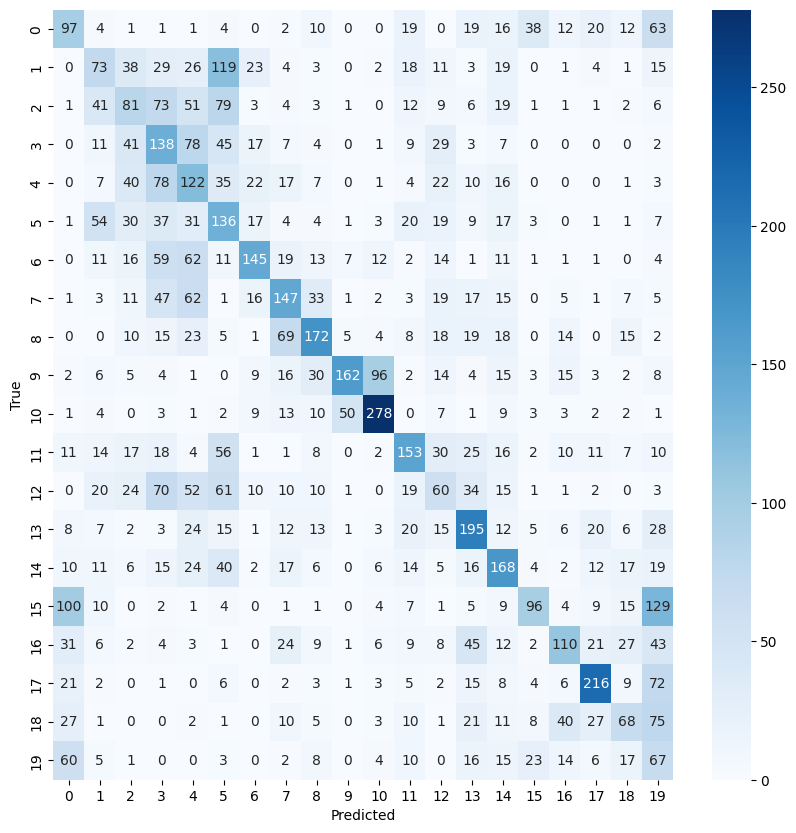

In [49]:
evaluate_model(model1, X_test_padded, y_test)

236/236 [==============================] - 13s 55ms/step
Accuracy: 0.4970791290493893
Precision: 0.3076923076923077
Recall: 0.35989717223650386
F1 Score: 0.33175355450236965


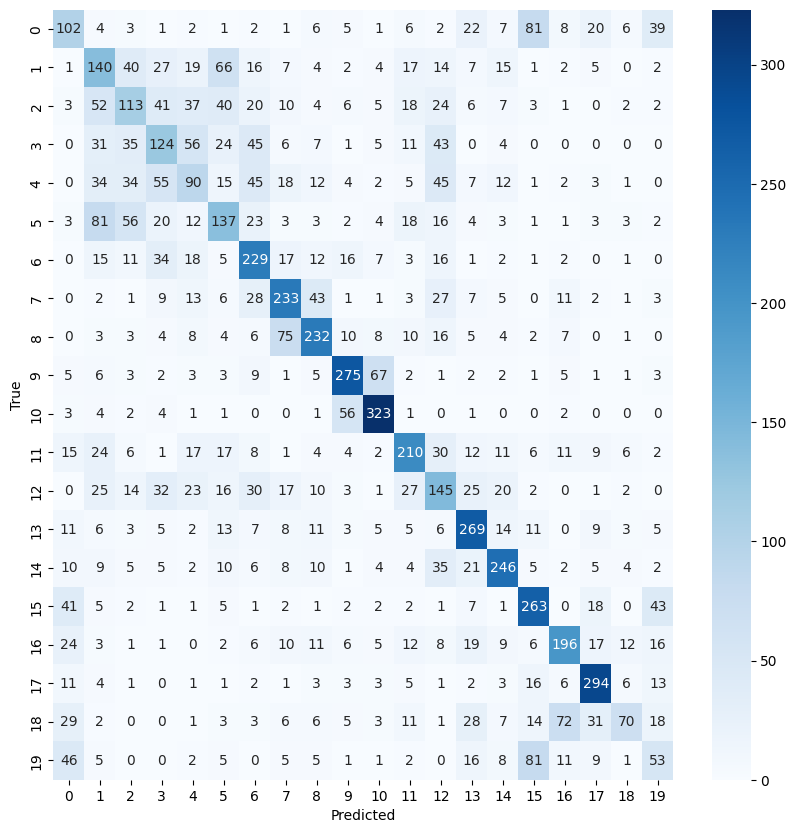

In [50]:
evaluate_model(model2, X_test_padded, y_test)

236/236 [==============================] - 13s 55ms/step
Accuracy: 0.42525225703664365
Precision: 0.25995316159250587
Recall: 0.2853470437017995
F1 Score: 0.27205882352941174


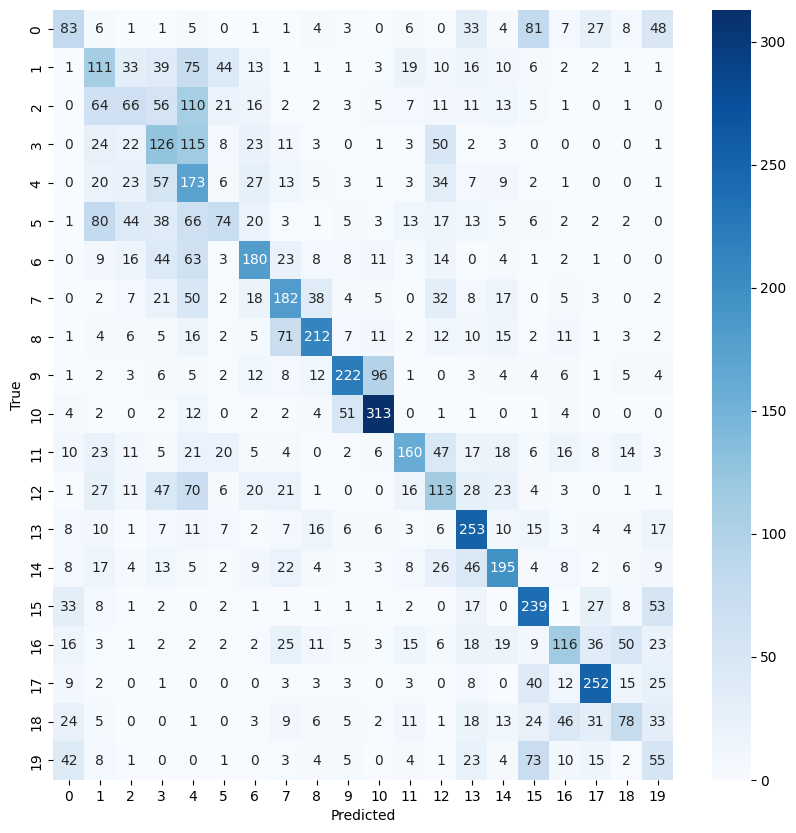

In [51]:
evaluate_model(model3, X_test_padded, y_test)

236/236 [==============================] - 13s 57ms/step
Accuracy: 0.4794211364843335
Precision: 0.30864197530864196
Recall: 0.3856041131105398
F1 Score: 0.34285714285714286


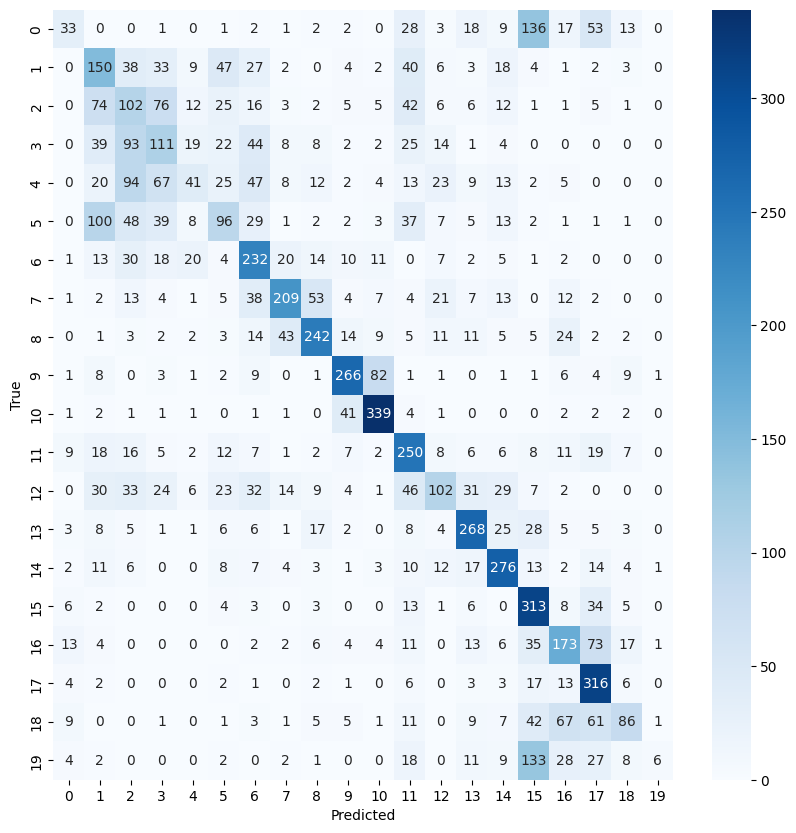

In [52]:
evaluate_model(model4, X_test_padded, y_test)

236/236 [==============================] - 22s 94ms/step
Accuracy: 0.37400424853956454
Precision: 0.22863741339491916
Recall: 0.2544987146529563
F1 Score: 0.24087591240875914


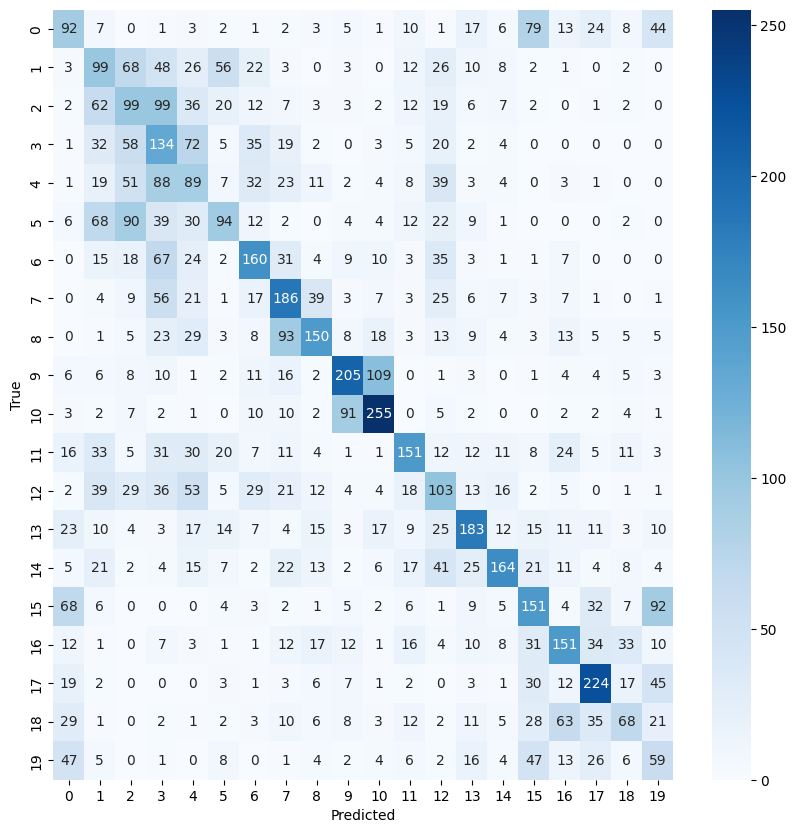

In [53]:
evaluate_model(model5, X_test_padded, y_test)

236/236 [==============================] - 40s 168ms/step
Accuracy: 0.7511949017525226
Precision: 0.7380191693290735
Recall: 0.5938303341902313
F1 Score: 0.658119658119658


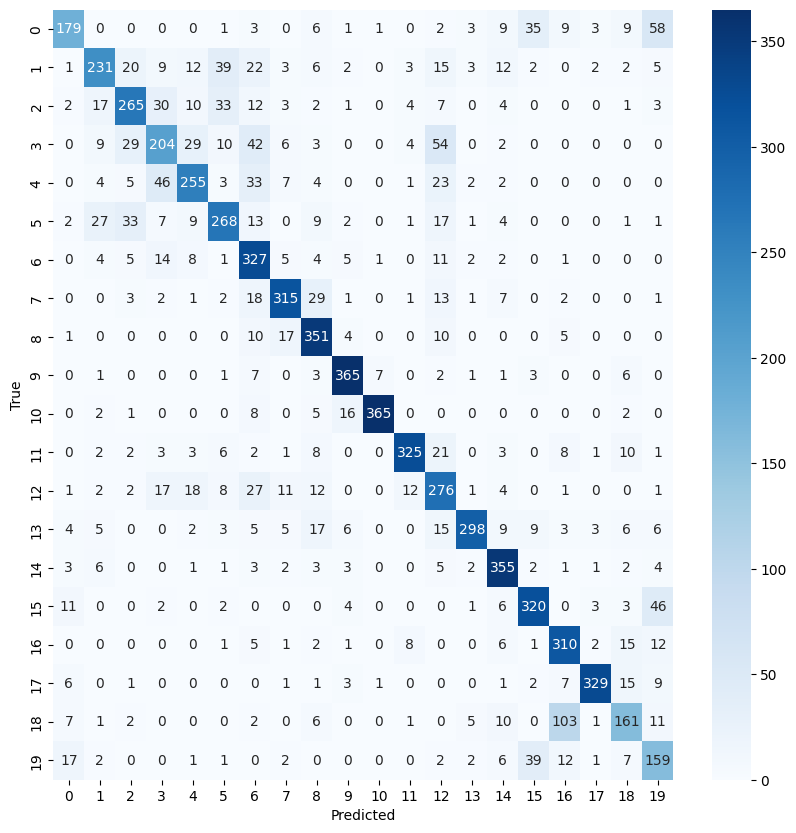

In [54]:
evaluate_model(model_cnn, X_test_padded, y_test)